In [2]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [3]:
#loading training data file
train_data=pd.read_csv(r'C:\Users\Csp\Downloads\train_s3TEQDk (1).csv')

#display top of dataset
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#loading testing data file
test_data=pd.read_csv(r'C:\Users\Csp\Downloads\test_mSzZ8RL.csv')

#display top of dataset
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
### Merging both train and test file to a single one using pd.concat, perform feature engineering 
###and then again dividing them later

## Creating a new Dataframe 'data ' with an extra variable 'root' specifying where each observation belong

train_data['root']='train'
test_data['root']= 'test'

#merging both train and test

data=pd.concat([train_data,test_data],ignore_index=True, sort=False)

#displaying top of dataset
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,root
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [6]:
## Checking for shape of the data

print('Shape of train_data:',train_data.shape)
print('Shape of test_data:',test_data.shape)
print('Shape of merged Dataframe data :',data.shape)

Shape of train_data: (245725, 12)
Shape of test_data: (105312, 11)
Shape of merged Dataframe data : (351037, 12)


In [7]:
# Selecting 'ID' as index for both training and testing dataframes

data.set_index("ID", inplace=True)

In [8]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,root
ID,,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [9]:
data.dtypes

Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
root                    object
dtype: object

In [10]:
data.apply(lambda x: len(x.unique()))

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     3
root                        2
dtype: int64

In [11]:
data.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
root                        0
dtype: int64

In [12]:
#repalcing nan values for Credit_Product
data['Credit_Product']=data['Credit_Product'].fillna(data['Credit_Product'].mode()[0])

#repalcing nan values for Is_Lead
data['Is_Lead']=data['Is_Lead'].fillna(data['Is_Lead'].mode()[0])

In [13]:
#Now checking for null values in data after filling missing values.

data.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
root                   0
dtype: int64

In [14]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,351037.000000
mean,43.860716,46.924244,1.130141e+06,0.166045
std,14.841932,32.329303,8.569530e+05,0.372122
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


<AxesSubplot:>

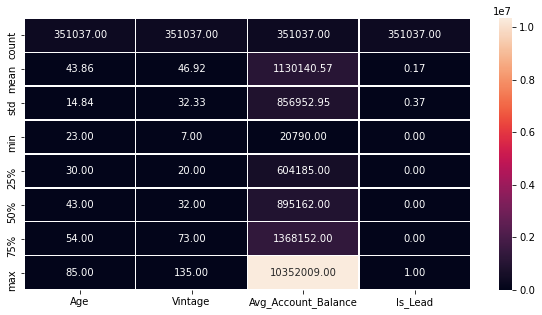

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data.describe(),annot=True,linecolor='white',fmt='.2f',linewidths=0.1)

Male      191902
Female    159135
Name: Gender, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64
-------------------------------------------------------------------------------------------------------------------
X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64
-------------------------------------------------------------------------------------------------------------------
No     247812
Yes    103225
Name: Credit_Product, dtype: int64
-------------------------------------------------------------------------------------------------------------------
No     214087
Yes    136950
Name: Is_Active, dtype: int64
-------------------------------------------------------------------------------------------------------------------
0.0    292749
1.0     5828

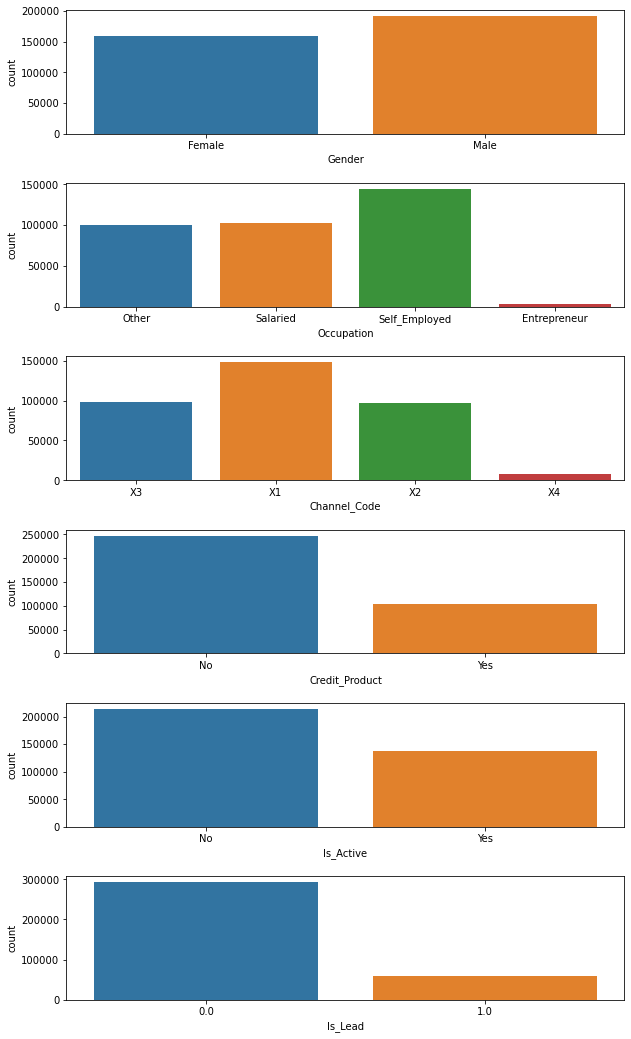

In [16]:
#Visulaization for catagorical columns using count plot

plt.figure(figsize=(10,10))

plt.subplot(611)
ax=sns.countplot(data['Gender'])
print(data['Gender'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(612)
ax=sns.countplot(data['Occupation'])
print(data['Occupation'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(613)
ax=sns.countplot(data['Channel_Code'])
print(data['Channel_Code'].value_counts())  

print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(614)
ax=sns.countplot(data['Credit_Product'])
print(data['Credit_Product'].value_counts())  
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(615)
ax=sns.countplot(data['Is_Active'])
print(data['Is_Active'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(616)
ax=sns.countplot(data['Is_Lead'])
print(data['Is_Lead'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

Percentage of female customers who are interested for credit card: 14.267760077921263
Percentage of male customers who are interested for credit card: 18.542276787110087


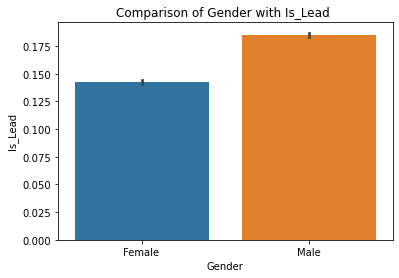

In [17]:
#Visualization of bar plot of Gender by Is_Lead
sns.barplot(x='Gender',y='Is_Lead',data=data)
plt.title('Comparison of Gender with Is_Lead ')

#print percentages
print("Percentage of female customers who are interested for credit card:", data["Is_Lead"][data["Gender"] == 'Female'].value_counts(normalize = True)[1]*100)
print("Percentage of male customers who are interested for credit card:", data["Is_Lead"][data["Gender"] == 'Male'].value_counts(normalize = True)[1]*100)

Percentage of customers with channel_code_X1 who are interested for credit card: 6.398024318160349
Percentage of customers with channel_code_X2 who are interested for credit card: 22.91696765804627
Percentage of customers with channel_code_X3 who are interested for credit card: 25.73866361845664
Percentage of customers with channel_code_X4 who are interested for credit card: 17.354124748490946


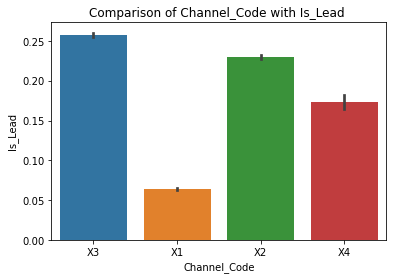

In [18]:
#Visualization of bar plot of Channel_Code by Is_Lead
sns.barplot(x='Channel_Code',y='Is_Lead',data=data)
plt.title('Comparison of Channel_Code with Is_Lead ')

#Print percentages
print("Percentage of customers with channel_code_X1 who are interested for credit card:", data["Is_Lead"][data["Channel_Code"] == 'X1'].value_counts(normalize = True)[1]*100)
print("Percentage of customers with channel_code_X2 who are interested for credit card:", data["Is_Lead"][data["Channel_Code"] == 'X2'].value_counts(normalize = True)[1]*100)
print("Percentage of customers with channel_code_X3 who are interested for credit card:", data["Is_Lead"][data["Channel_Code"] == 'X3'].value_counts(normalize = True)[1]*100)
print("Percentage of customers with channel_code_X4 who are interested for credit card:", data["Is_Lead"][data["Channel_Code"] == 'X4'].value_counts(normalize = True)[1]*100)

Percentage of Active customers who are interested for credit card: 19.718875502008032
Percentage of Inactive customers who are interested for credit card: 14.612283791169013


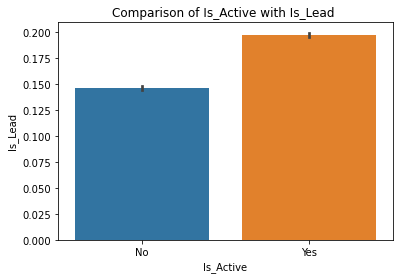

In [19]:
#Visualization of bar plot of Is_Active by Is_Lead
sns.barplot(x='Is_Active',y='Is_Lead',data=data)
plt.title('Comparison of Is_Active with Is_Lead ')

#Print percentages
print("Percentage of Active customers who are interested for credit card:", data["Is_Lead"][data["Is_Active"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of Inactive customers who are interested for credit card:", data["Is_Lead"][data["Is_Active"] == 'No'].value_counts(normalize = True)[1]*100)

Percentage of customers holding Credit_Product who are interested for credit card: 21.98110922741584
Percentage of customers not holding any Credit_Productwho are interested for credit card: 14.364921795554695


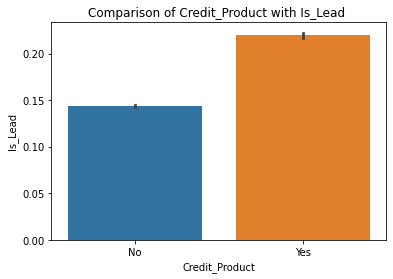

In [20]:
#Visualization of bar plot of Credit_Product by Is_Lead
sns.barplot(x='Credit_Product',y='Is_Lead',data=data)
plt.title('Comparison of Credit_Product with Is_Lead ')

#Print percentages
print("Percentage of customers holding Credit_Product who are interested for credit card:", data["Is_Lead"][data["Credit_Product"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not holding any Credit_Productwho are interested for credit card:", data["Is_Lead"][data["Credit_Product"] == 'No'].value_counts(normalize = True)[1]*100)

Percentage of customers who are self-employed, interested for credit card: 19.323560848984577
Percentage of customers who are Salaried, interested for credit card: 11.17070895522388
Percentage of customers who are Other, interested for credit card: 17.136903812410274
Percentage of customers who are Entrepreneur, interested for credit card: 47.07453913972749


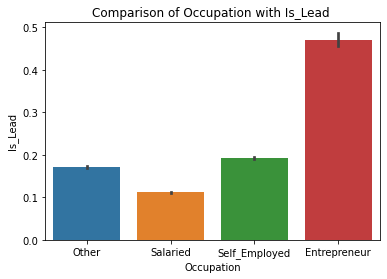

In [21]:
#Visualization of bar plot of Credit_Product by Is_Lead
sns.barplot(x='Occupation',y='Is_Lead',data=data)
plt.title('Comparison of Occupation with Is_Lead ')

#Print percentages
print("Percentage of customers who are self-employed, interested for credit card:", data["Is_Lead"][data["Occupation"] == 'Self_Employed'].value_counts(normalize = True)[1]*100)
print("Percentage of customers who are Salaried, interested for credit card:", data["Is_Lead"][data["Occupation"] == 'Salaried'].value_counts(normalize = True)[1]*100)
print("Percentage of customers who are Other, interested for credit card:", data["Is_Lead"][data["Occupation"] == 'Other'].value_counts(normalize = True)[1]*100)
print("Percentage of customers who are Entrepreneur, interested for credit card:", data["Is_Lead"][data["Occupation"] == 'Entrepreneur'].value_counts(normalize = True)[1]*100)

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

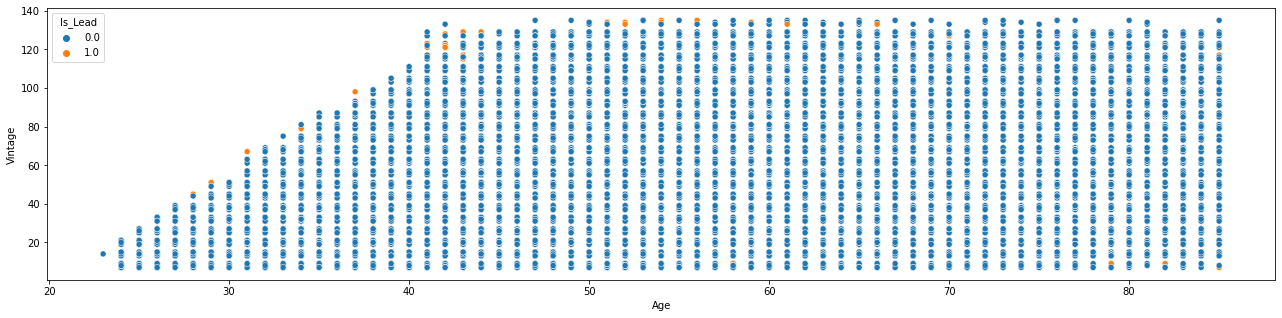

In [22]:
plt.figure(figsize=(22,5))
sns.scatterplot(x='Age',y='Vintage',data=data,hue=data['Is_Lead'])

<AxesSubplot:xlabel='Age', ylabel='Avg_Account_Balance'>

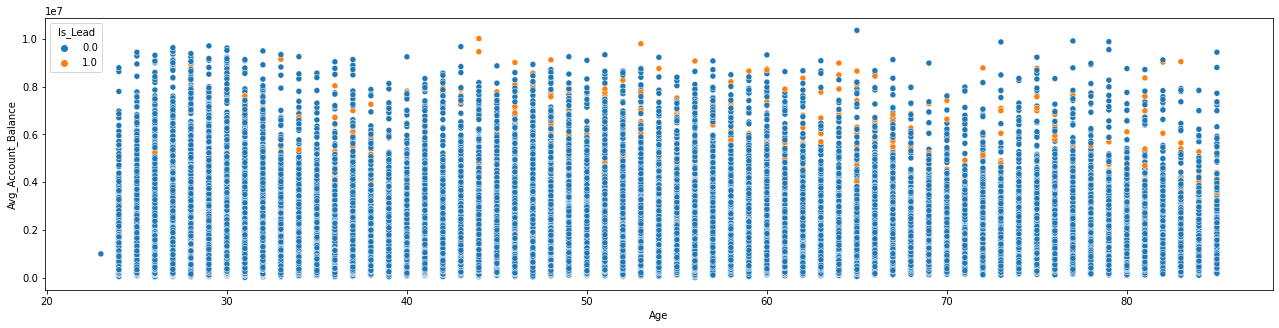

In [23]:
plt.figure(figsize=(22,5))
sns.scatterplot(x='Age',y='Avg_Account_Balance',data=data,hue=data['Is_Lead'])

<AxesSubplot:xlabel='Vintage', ylabel='Avg_Account_Balance'>

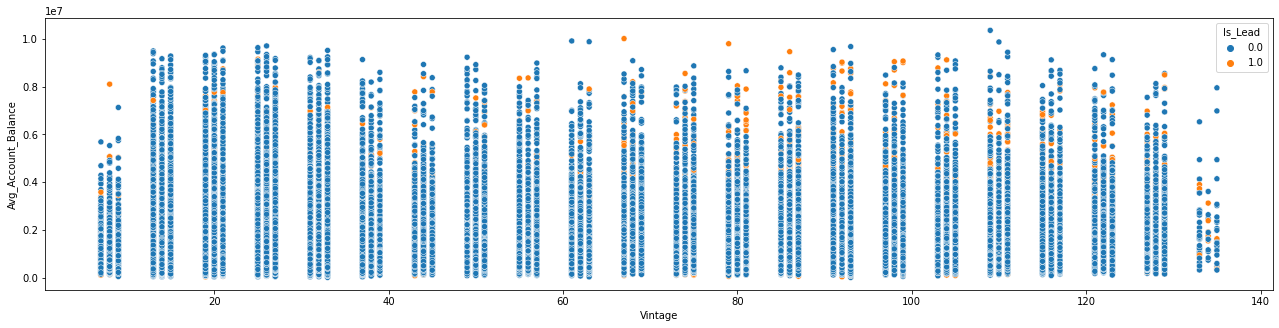

In [24]:
plt.figure(figsize=(22,5))
sns.scatterplot(x='Vintage',y='Avg_Account_Balance',data=data,hue=data['Is_Lead'])

In [25]:
data.dtypes

Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
root                    object
dtype: object

In [26]:
### Encoding object type data to float type.

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

#ordinalEncoder is used to convert all datatypes into float type
cols=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in cols:
    data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [27]:
data.dtypes

Gender                 float64
Age                      int64
Region_Code            float64
Occupation             float64
Channel_Code           float64
Vintage                  int64
Credit_Product         float64
Avg_Account_Balance      int64
Is_Active              float64
Is_Lead                float64
root                    object
dtype: object

<AxesSubplot:>

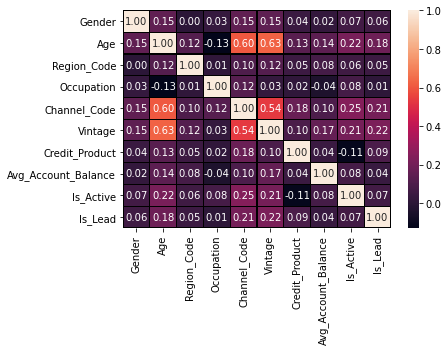

In [28]:
sns.heatmap(data.corr(),linecolor='black',linewidth=0.1,annot=True,fmt='0.2f')

In [29]:
## Splitting training and testing model

#Divide into test and train:
train = data.loc[data['root']=="train"]
test = data.loc[data['root']=="test"]

#Drop unnecessary columns:
test.drop(['Is_Lead','root'],axis=1,inplace=True)
train.drop(['root'],axis=1,inplace=True)

In [30]:
data['Is_Lead'].value_counts()

0.0    292749
1.0     58288
Name: Is_Lead, dtype: int64

In [31]:
x=train.drop('Is_Lead',axis=1) 
y=train['Is_Lead']

In [32]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [34]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    LR_Accu=accuracy_score(y_test,pred_test)
    if LR_Accu>maxAccu:
        maxAccu=LR_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

Best Accuracy is :  50.318771507073436 on random state : 21


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=21)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (262411, 9) (262411,)
Testing set shape:  (112463, 9) (112463,)


In [36]:
#Checking for Best Model


from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [38]:
cv_means=[]
cv_std=[]

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[37487 18386]
 [20355 36235]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     55873
         1.0       0.66      0.64      0.65     56590

    accuracy                           0.66    112463
   macro avg       0.66      0.66      0.66    112463
weighted avg       0.66      0.66      0.66    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for GaussianNB : 65.55222606546153
-------------------------------------------------------------------------------------------------------------------
cross_val_score for GaussianNB: 65.20137490099603
Standard Deviation: 0.0030570667

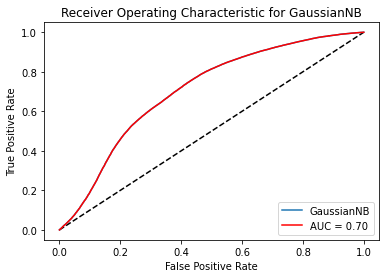

In [39]:
#GaussianNB
GNB=GaussianNB()

GNB.fit(x_train,y_train)
pred_test=GNB.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for GaussianNB :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

a1=cross_val_score(GNB,x_over,y_over,cv=5).mean()*100
a2=cross_val_score(GNB,x_over,y_over,cv=5).std()

print('cross_val_score for GaussianNB:',a1)
print('Standard Deviation:',a2)

cv_means.append(a1)
cv_std.append(a2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=GNB.predict_proba(x_test)[:,1] 
pred=GNB.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)
print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for GaussianNB')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[36031 19842]
 [17509 39081]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.66     55873
         1.0       0.66      0.69      0.68     56590

    accuracy                           0.67    112463
   macro avg       0.67      0.67      0.67    112463
weighted avg       0.67      0.67      0.67    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for LinearDiscriminantAnalysis : 66.78818811520233
-------------------------------------------------------------------------------------------------------------------
cross_val_score for LinearDiscriminantAnalysis: 66.62798748158669


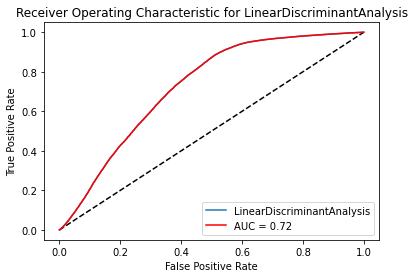

In [40]:
#LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()

LDA.fit(x_train,y_train)
pred_test=LDA.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for LinearDiscriminantAnalysis :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

b1=cross_val_score(LDA,x_over,y_over,cv=5).mean()*100
b2=cross_val_score(LDA,x_over,y_over,cv=5).std()

print('cross_val_score for LinearDiscriminantAnalysis:',b1)
print('Standard Deviation:',b2)

cv_means.append(b1)
cv_std.append(b2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=LDA.predict_proba(x_test)[:,1] 
pred=LDA.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LinearDiscriminantAnalysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for LinearDiscriminantAnalysis')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[44605 11268]
 [10522 46068]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80     55873
         1.0       0.80      0.81      0.81     56590

    accuracy                           0.81    112463
   macro avg       0.81      0.81      0.81    112463
weighted avg       0.81      0.81      0.81    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for DecisionTreeClassifier: 80.6247388029841
-------------------------------------------------------------------------------------------------------------------
cross_val_score for DecisionTreeClassifier: 79.39283127365002
Standard D

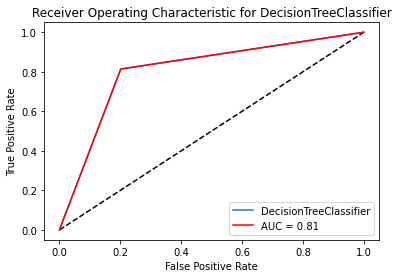

In [41]:
#DecisionTreeClassifier
DTC=DecisionTreeClassifier()

DTC.fit(x_train,y_train)
pred_test=DTC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for DecisionTreeClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

c1=cross_val_score(DTC,x_over,y_over,cv=5).mean()*100
c2=cross_val_score(DTC,x_over,y_over,cv=5).std()

print('cross_val_score for DecisionTreeClassifier:',c1)
print('Standard Deviation:',c2)

cv_means.append(c1)
cv_std.append(c2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=DTC.predict_proba(x_test)[:,1] 
pred=DTC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for DecisionTreeClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[50959  4914]
 [11912 44678]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     55873
         1.0       0.90      0.79      0.84     56590

    accuracy                           0.85    112463
   macro avg       0.86      0.85      0.85    112463
weighted avg       0.86      0.85      0.85    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for RandomForestClassifier: 85.03863492882104
-------------------------------------------------------------------------------------------------------------------
cross_val_score for RandomForestClassifier: 82.97884242062423
Standard 

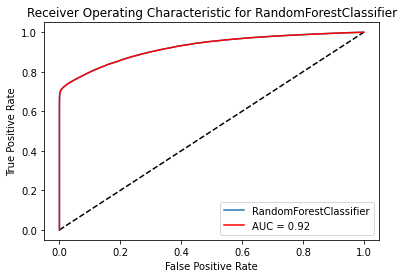

In [42]:
#RandomForestClassifier
RFC=RandomForestClassifier()

RFC.fit(x_train,y_train)
pred_test=RFC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for RandomForestClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

d1=cross_val_score(RFC,x_over,y_over,cv=5).mean()*100
d2=cross_val_score(RFC,x_over,y_over,cv=5).std()

print('cross_val_score for RandomForestClassifier:',d1)
print('Standard Deviation:',d2)

cv_means.append(d1)
cv_std.append(d2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=RFC.predict_proba(x_test)[:,1] 
pred=RFC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for RandomForestClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[50680  5193]
 [12449 44141]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85     55873
         1.0       0.89      0.78      0.83     56590

    accuracy                           0.84    112463
   macro avg       0.85      0.84      0.84    112463
weighted avg       0.85      0.84      0.84    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for AdaBoostClassifier: 84.31306296293003
-------------------------------------------------------------------------------------------------------------------
cross_val_score for AdaBoostClassifier: 81.41458405769619
Standard Deviatio

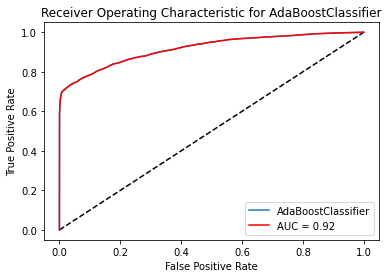

In [43]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_test=Ada.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for AdaBoostClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

e1=cross_val_score(Ada,x_over,y_over,cv=5).mean()*100
e2=cross_val_score(Ada,x_over,y_over,cv=5).std()

print('cross_val_score for AdaBoostClassifier:',e1)
print('Standard Deviation:',e2)

cv_means.append(e1)
cv_std.append(e2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=Ada.predict_proba(x_test)[:,1] 
pred=Ada.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for AdaBoostClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[52780  3093]
 [12993 43597]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.87     55873
         1.0       0.93      0.77      0.84     56590

    accuracy                           0.86    112463
   macro avg       0.87      0.86      0.86    112463
weighted avg       0.87      0.86      0.86    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for GradientBoostingClassifier: 85.69662911357513
-------------------------------------------------------------------------------------------------------------------
cross_val_score for GradientBoostingClassifier: 83.13116287337508
S

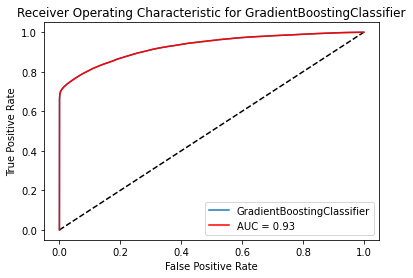

In [44]:
#GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_test=GBC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for GradientBoostingClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

f1=cross_val_score(GBC,x_over,y_over,cv=5).mean()*100
f2=cross_val_score(GBC,x_over,y_over,cv=5).std()

print('cross_val_score for GradientBoostingClassifier:',f1)
print('Standard Deviation:',f2)

cv_means.append(f1)
cv_std.append(f2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=GBC.predict_proba(x_test)[:,1] 
pred=GBC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for GradientBoostingClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[49795  6078]
 [11661 44929]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85     55873
         1.0       0.88      0.79      0.84     56590

    accuracy                           0.84    112463
   macro avg       0.85      0.84      0.84    112463
weighted avg       0.85      0.84      0.84    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for ExtraTreesClassifier: 84.22681237384741
-------------------------------------------------------------------------------------------------------------------
cross_val_score for ExtraTreesClassifier: 82.23485792335985
Standard Devi

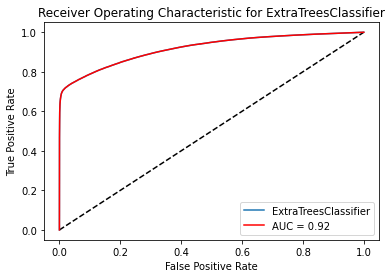

In [45]:
#ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_test=ETC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for ExtraTreesClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

g1=cross_val_score(ETC,x_over,y_over,cv=5).mean()*100
g2=cross_val_score(ETC,x_over,y_over,cv=5).std()

print('cross_val_score for ExtraTreesClassifier:',g1)
print('Standard Deviation:',g2)

cv_means.append(g1)
cv_std.append(g2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=ETC.predict_proba(x_test)[:,1] 
pred=ETC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for ExtraTreesClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[34691 21182]
 [13049 43541]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.73      0.62      0.67     55873
         1.0       0.67      0.77      0.72     56590

    accuracy                           0.70    112463
   macro avg       0.70      0.70      0.69    112463
weighted avg       0.70      0.70      0.69    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for KNeighborsClassifier: 69.56243386713852
-------------------------------------------------------------------------------------------------------------------
cross_val_score for KNeighborsClassifier: 70.91262976989519
Standard Devi

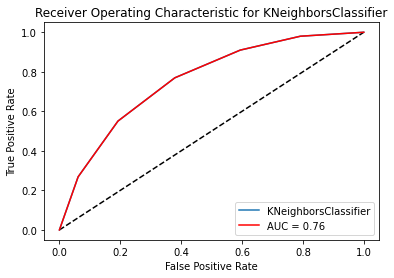

In [46]:
#KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_test=KNN.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for KNeighborsClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

i1=cross_val_score(KNN,x_over,y_over,cv=5).mean()*100
i2=cross_val_score(KNN,x_over,y_over,cv=5).std()

print('cross_val_score for KNeighborsClassifier:',i1)
print('Standard Deviation:',i2)

cv_means.append(i1)
cv_std.append(i2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=KNN.predict_proba(x_test)[:,1] 
pred=KNN.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for KNeighborsClassifier')
plt.show()

In [47]:
#SGDClassifier
SGD=SGDClassifier()
SGD.fit(x_train,y_train)
pred_test=SGD.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for SGDClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

j1=cross_val_score(SGD,x_over,y_over,cv=5).mean()*100
j2=cross_val_score(SGD,x_over,y_over,cv=5).std()

print('cross_val_score forSGDClassifier:',j1)
print('Standard Deviation:',j2)

cv_means.append(j1)
cv_std.append(j2)

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[    0 55873]
 [    0 56590]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     55873
         1.0       0.50      1.00      0.67     56590

    accuracy                           0.50    112463
   macro avg       0.25      0.50      0.33    112463
weighted avg       0.25      0.50      0.34    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for SGDClassifier: 50.318771507073436
-------------------------------------------------------------------------------------------------------------------
cross_val_score forSGDClassifier: 50.00053352184432
Standard Deviation: 0.00082

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[    0 55873]
 [    0 56590]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     55873
         1.0       0.50      1.00      0.67     56590

    accuracy                           0.50    112463
   macro avg       0.25      0.50      0.33    112463
weighted avg       0.25      0.50      0.34    112463

-------------------------------------------------------------------------------------------------------------------
Accuracy score for LogisticRegression : 50.318771507073436
-------------------------------------------------------------------------------------------------------------------
cross_val_score for LogisticRegression: 50.0
Standard Deviation: 5.964836

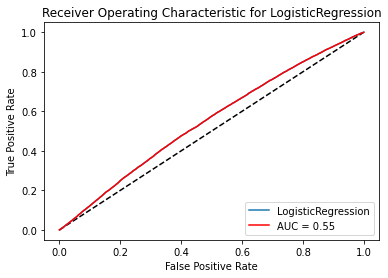

In [48]:
#LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for LogisticRegression :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

k1=cross_val_score(lr,x_over,y_over,cv=5).mean()*100
k2=cross_val_score(lr,x_over,y_over,cv=5).std()

print('cross_val_score for LogisticRegression:',k1)
print('Standard Deviation:',k2)

cv_means.append(k1)
cv_std.append(k2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=lr.predict_proba(x_test)[:,1] 
pred=lr.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)

print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for LogisticRegression')
plt.show()

In [49]:
cv_means

[65.20137490099603,
 66.62798748158669,
 79.39283127365002,
 82.97884242062423,
 81.41458405769619,
 83.13116287337508,
 82.23485792335985,
 70.91262976989519,
 50.00053352184432,
 50.0]

In [50]:
cv_std

[0.003057066706001056,
 0.0031041567769849294,
 0.11291917396231489,
 0.14263072339375282,
 0.14617433012720432,
 0.15589916701083456,
 0.13687601610262204,
 0.015212963681178783,
 0.0008249564728274499,
 5.9648362187216745e-06]

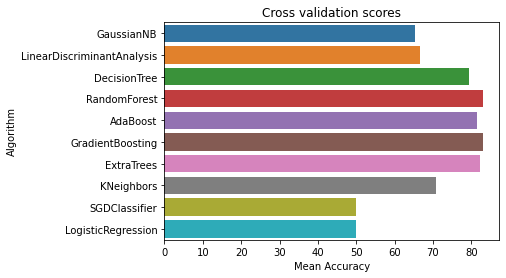

In [51]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["GaussianNB", "LinearDiscriminantAnalysis","DecisionTree","RandomForest","AdaBoost",
                                    "GradientBoosting","ExtraTrees", "KNeighbors", "SGDClassifier",
                                     "LogisticRegression"]})
                           
                                                      

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [52]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,65.201375,0.003057,GaussianNB
1,66.627987,0.003104,LinearDiscriminantAnalysis
2,79.392831,0.112919,DecisionTree
3,82.978842,0.142631,RandomForest
4,81.414584,0.146174,AdaBoost
5,83.131163,0.155899,GradientBoosting
6,82.234858,0.136876,ExtraTrees
7,70.912630,0.015213,KNeighbors
8,50.000534,0.000825,SGDClassifier
9,50.000000,0.000006,LogisticRegression


In [54]:
from joblib import dump, load
dump(GBC, 'gradboost.joblib') 

['gradboost.joblib']

In [56]:
pre=load("gradboost.joblib")
predicted=pre.predict(test)
ff=pd.DataFrame({"ID":test_data["ID"],
                 "Is_Lead"
                 :predicted})

ff.to_csv("gradboost.csv")